## notebook 08: order effect

In this notebook we plot the order effect that we observed in notebook nb_03a and nb_03p. 

Within the progress of our analysis, we observe a trend of reduced position error and precision error std over sessions. This is unsurprising, as placement of objects and shape of the outbound path do not vary across trials and conditions. Solely the number of objects from a given set of objects with fixed positions differs between conditions. However, including session number as an additional fixed effect in a regression model results in only slight improvement of data fit. As the order effect is small and not the primary focus of this study we do not consider it in other analyses.

In [1]:
# importing python packages
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
from scipy.stats import linregress
import os
# importing modules from our analysis pipeline
from utilities import helpers

In [2]:
# set data path and save path
data_root = f"..{os.sep}data{os.sep}"
save_path = f"..{os.sep}figures{os.sep}"
settingsfile = helpers.create_trial_settings_dict_from_session_json(data_root + "experiment_settingsfile.json")

In [3]:
# read in experiment result dataframe
experiment_results = pd.read_csv(data_root + "processed_data.csv", index_col=0)
experiment_results.head()

block_num    trial_name  line_i   experiment       ppid  \
session_num                                                            
1                    1  99_obj_right       0  MM04_PU01_2  MM04_PU01   
1                    1   2_obj_right       1  MM04_PU01_2  MM04_PU01   
1                    1   3_obj_right       2  MM04_PU01_2  MM04_PU01   
1                    1  10_obj_right       3  MM04_PU01_2  MM04_PU01   
1                    1   2_obj_right       4  MM04_PU01_2  MM04_PU01   

             trial_num  trial_num_in_block  start_time  end_time  \
session_num                                                        
1                    1                   1    1007.957  1069.763   
1                    2                   2    1069.763  1143.276   
1                    3                   3    1143.276  1206.921   
1                    4                   4    1206.921  1276.941   
1                    5                   5    1276.941  1352.005   

                           BlockName  ... err_pos_LM95  err_dist_LM96  \
session_num                           ...                               
1            6reps_all_cond_shuffled  ...     2.708553      -2.177960   
1            6reps_all_cond_shuffled  ...     9.236702      -4.143775   
1            6reps_all_cond_shuffled  ...     8.713744      -6.302570   
1            6reps_all_cond_shuffled  ...     4.695786       4.294370   
1            6reps_all_cond_shuffled  ...     7.918898      -2.932300   

             err_dir_LM96  err_pos_LM96  err_dist_LM97  err_dir_LM97  \
session_num                                                            
1                1.780896      2.708553      -2.705400      0.119812   
1               -9.322276      9.236702       0.930272     -8.194557   
1               -6.947332      8.713744      -1.953937     -7.745969   
1               -1.978649      4.695786       4.653014      0.547871   
1               -8.203637      7.918898       1.455035     -6.911470   

             err_pos_LM97  err_dist_LM98  err_dir_LM98  err_pos_LM98  
session_num                                                           
1                2.708553      -1.772623      6.832163      2.708553  
1                9.236702      -4.252959    -30.028827      9.236702  
1                8.713744      -6.668499    -22.495792      8.713744  
1                4.695786       4.008559     -7.011794      4.695786  
1                7.918898      -3.202387    -25.489808      7.918898  

[5 rows x 324 columns]

In [4]:
# group dataframe by condition ("num_objects") and participants ("ppid")
grouped = experiment_results.groupby(["session_num","num_objects", "ppid"])
# then calculate the median position error
grouped_errors = grouped["err_pos_walk"].median()
# and the variance of position error
grouped_errors_var = grouped["err_pos_walk"].std()
# and reset the MultiIndex for easier access
grouped_errors = grouped_errors.reset_index()
grouped_errors_var = grouped_errors_var.reset_index()
# transform accuracy and precision measure to log space
grouped_errors["accuracy"] = grouped_errors.err_pos_walk
grouped_errors["precision"] = grouped_errors_var.err_pos_walk
grouped_errors.head()

session_num  num_objects       ppid  err_pos_walk   accuracy  precision
0            1            0  MM04_PU01     11.013864  11.013864  15.617606
1            1            0  MM04_PU03     14.472647  14.472647   3.478336
2            1            0  MM04_PU04     21.800874  21.800874   9.534767
3            1            0  MM04_PU05     17.136141  17.136141   2.960550
4            1            0  MM04_PU06      9.960890   9.960890   4.815629

In [5]:
# add condition session column
grouped_errors["condition_session"] = [str(grouped_errors.iloc[i].num_objects) + "_" + str(grouped_errors.iloc[i].session_num) for i in range(len(grouped_errors))]

## Figure S2

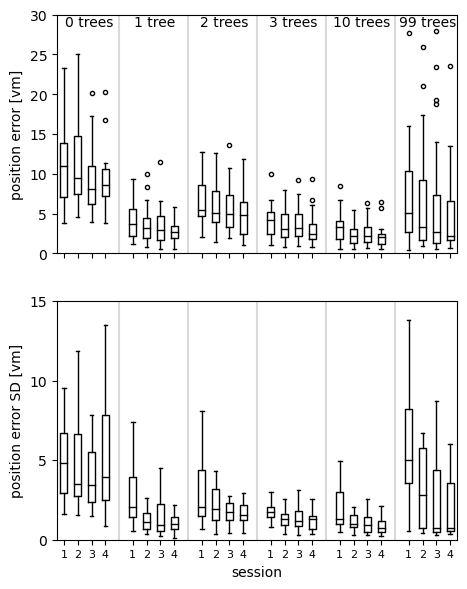

In [6]:
fig, axs = plt.subplots(2,1)

positions = [0,1,2,3, 5,6,7,8, 10,11,12,13, 15,16,17,18, 20,21,22,23, 25,26,27,28]
boxprops = dict(linestyle='-', linewidth=1, color='k')
medianprops = dict(linestyle='-', linewidth=1, color='k')
whiskerprops = dict(linestyle='-', linewidth=1, color='k')
flierprops = dict(marker=".", color='k')

####################################################################################################
########################################## ACCURACY ################################################
####################################################################################################

grouped_errors.boxplot(ax=axs[0], column="accuracy", by="condition_session", grid=False, positions=positions, boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops, flierprops=flierprops)

axs[0].vlines(x=[4,9,14,19,24], ymin=0, ymax=30, color="black", alpha=0.15)
axs[0].text(x=0.05, y=28.5, s="0 trees", fontsize=10)
axs[0].text(x=5.05, y=28.5, s="1 tree", fontsize=10)
axs[0].text(x=9.85, y=28.5, s="2 trees", fontsize=10)
axs[0].text(x=14.85, y=28.5, s="3 trees", fontsize=10)
axs[0].text(x=19.5, y=28.5, s="10 trees", fontsize=10)
axs[0].text(x=24.3, y=28.5, s="99 trees", fontsize=10)
axs[0].set_ylim([0,30])
axs[0].set_xlim([-0.5, 28.5])
axs[0].set_ylabel("position error [vm]")
axs[0].set_xlabel("")
plt.xticks(rotation=0)
axs[0].set_xticklabels(np.tile(["","","",""],6), fontsize=8)
axs[0].set_title("")
fig.suptitle("")

####################################################################################################
########################################## PRECISION ################################################
####################################################################################################

grouped_errors.boxplot(ax=axs[1], column="precision", by="condition_session", showfliers=False, grid=False, positions=positions, boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops, flierprops=flierprops)

axs[1].vlines(x=[4,9,14,19,24], ymin=0, ymax=600, color="black", alpha=0.15)
axs[1].set_ylim([0,15])
axs[1].set_xlim([-0.5, 28.5])
axs[1].set_ylabel("position error SD [vm]")
axs[1].set_xlabel("session")
plt.xticks(rotation=0)
axs[1].set_xticklabels(np.tile(["1","2","3","4"],6), fontsize=8)
axs[1].set_yticks([0,5,10,15])
axs[1].set_yticklabels(["0","5","10","15"])
axs[1].set_title("")
fig.suptitle("")
fig.set_size_inches(5,7)

filename = "figure_S2{}"
fig.savefig(save_path + filename.format(".png"))
fig.savefig(save_path + filename.format(".pdf"))
fig.savefig(save_path + filename.format(".svg"))